In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import plotly
import geopy
import seaborn as sns
import plotly.graph_objs as go
pd.options.mode.chained_assignment = None

Download data

In [2]:
df = pd.read_csv('listingss.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,106332,"Lovely large room, Bethnal Green",264345,Susie,NaN,Tower Hamlets,51.52874,-0.05396,Private room,55,3,65,2016-06-10,0.47,1,74,0,NaN
1,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56861,-0.11270,Private room,50,1,30,2022-07-15,0.20,2,343,9,NaN
2,284532,COSY STUDIO-FLAT WITH A GREAT VIEW,1481412,Luca,NaN,Tower Hamlets,51.52851,-0.07426,Entire home/apt,90,5,42,2022-01-04,0.34,1,222,1,NaN
3,107048,A Luxury Studio Suite in Clerkenwell,259088,Simon,NaN,Islington,51.52478,-0.10484,Private room,180,4,493,2022-09-02,3.59,5,236,20,NaN
4,284603,Notting Hill church stay in Heaven!,1481851,Tania,NaN,Kensington and Chelsea,51.51464,-0.20004,Entire home/apt,297,14,6,2022-07-04,0.05,1,180,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69346,9671724,"Cozy room in Greenwich, river view",49977905,Kurt,NaN,Greenwich,51.48300,-0.01346,Private room,55,5,67,2021-10-03,0.84,3,0,1,NaN
69347,20277958,River view Tate Modern,1132775,Mark,NaN,Southwark,51.50914,-0.10192,Entire home/apt,201,3,61,2022-09-09,0.99,1,0,12,NaN
69348,20512703,"Luxury 4 bed house, 100m to river and palace",1706966,Asher & Aileen,NaN,Richmond upon Thames,51.40571,-0.35325,Entire home/apt,246,3,6,2022-08-31,1.49,1,4,6,NaN
69349,49698549,Waterfront Hampton Stay,34213667,Alan,NaN,Richmond upon Thames,51.41029,-0.35975,Entire home/apt,250,3,9,2022-07-18,0.61,1,2,4,NaN


In [3]:
df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,6.935100e+04,6.935100e+04,0.0,69351.000000,69351.000000,69351.000000,69351.000000,69351.000000,52571.000000,69351.000000,69351.000000,69351.000000,0.0
mean,1.373703e+17,1.242124e+08,NaN,51.509544,-0.128489,177.208822,5.997505,17.537051,0.882593,11.987498,108.520266,4.734438,NaN
std,2.651479e+17,1.377104e+08,NaN,0.049182,0.100957,412.823024,25.709514,40.410763,1.274510,37.148839,132.821088,12.032502,NaN
min,1.391300e+04,4.775000e+03,NaN,51.272480,-0.523600,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,NaN
25%,1.810090e+07,1.870718e+07,NaN,51.483140,-0.189520,55.000000,1.000000,1.000000,0.120000,1.000000,0.000000,0.000000,NaN
50%,3.395467e+07,6.010350e+07,NaN,51.513600,-0.126200,100.000000,2.000000,4.000000,0.430000,1.000000,32.000000,0.000000,NaN
75%,5.265645e+07,1.960405e+08,NaN,51.539710,-0.068550,180.000000,4.000000,16.000000,1.080000,4.000000,228.000000,5.000000,NaN
max,7.123951e+17,4.788540e+08,NaN,51.708930,0.305150,25000.000000,1125.000000,1141.000000,51.330000,285.000000,365.000000,660.000000,NaN


In [4]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

Data cleaning and preparation

In [5]:
df.isna().sum()
df.drop(columns=['neighbourhood_group', 'license'], inplace=True)

In [6]:
df_without_nan = df.dropna()
df_without_nan

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,106332,"Lovely large room, Bethnal Green",264345,Susie,Tower Hamlets,51.52874,-0.05396,Private room,55,3,65,2016-06-10,0.47,1,74,0
1,13913,Holiday London DB Room Let-on going,54730,Alina,Islington,51.56861,-0.11270,Private room,50,1,30,2022-07-15,0.20,2,343,9
2,284532,COSY STUDIO-FLAT WITH A GREAT VIEW,1481412,Luca,Tower Hamlets,51.52851,-0.07426,Entire home/apt,90,5,42,2022-01-04,0.34,1,222,1
3,107048,A Luxury Studio Suite in Clerkenwell,259088,Simon,Islington,51.52478,-0.10484,Private room,180,4,493,2022-09-02,3.59,5,236,20
4,284603,Notting Hill church stay in Heaven!,1481851,Tania,Kensington and Chelsea,51.51464,-0.20004,Entire home/apt,297,14,6,2022-07-04,0.05,1,180,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69346,9671724,"Cozy room in Greenwich, river view",49977905,Kurt,Greenwich,51.48300,-0.01346,Private room,55,5,67,2021-10-03,0.84,3,0,1
69347,20277958,River view Tate Modern,1132775,Mark,Southwark,51.50914,-0.10192,Entire home/apt,201,3,61,2022-09-09,0.99,1,0,12
69348,20512703,"Luxury 4 bed house, 100m to river and palace",1706966,Asher & Aileen,Richmond upon Thames,51.40571,-0.35325,Entire home/apt,246,3,6,2022-08-31,1.49,1,4,6
69349,49698549,Waterfront Hampton Stay,34213667,Alan,Richmond upon Thames,51.41029,-0.35975,Entire home/apt,250,3,9,2022-07-18,0.61,1,2,4


So, availability_365 = 0 means that the listing is not available at all or in other words 0 days out of the year (365). Which can mean two things:
1) At the moment of collecting data for this dataset, those hosts had their listing availability set to 0 or 'Not available'
2)Bad data

EDA

Let's explore neighborhoods:

In [7]:
df['expected_revenue_in_1000'] = df.price * df.availability_365 / 1000
df

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,expected_revenue_in_1000
0,106332,"Lovely large room, Bethnal Green",264345,Susie,Tower Hamlets,51.52874,-0.05396,Private room,55,3,65,2016-06-10,0.47,1,74,0,4.070
1,13913,Holiday London DB Room Let-on going,54730,Alina,Islington,51.56861,-0.11270,Private room,50,1,30,2022-07-15,0.20,2,343,9,17.150
2,284532,COSY STUDIO-FLAT WITH A GREAT VIEW,1481412,Luca,Tower Hamlets,51.52851,-0.07426,Entire home/apt,90,5,42,2022-01-04,0.34,1,222,1,19.980
3,107048,A Luxury Studio Suite in Clerkenwell,259088,Simon,Islington,51.52478,-0.10484,Private room,180,4,493,2022-09-02,3.59,5,236,20,42.480
4,284603,Notting Hill church stay in Heaven!,1481851,Tania,Kensington and Chelsea,51.51464,-0.20004,Entire home/apt,297,14,6,2022-07-04,0.05,1,180,2,53.460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69346,9671724,"Cozy room in Greenwich, river view",49977905,Kurt,Greenwich,51.48300,-0.01346,Private room,55,5,67,2021-10-03,0.84,3,0,1,0.000
69347,20277958,River view Tate Modern,1132775,Mark,Southwark,51.50914,-0.10192,Entire home/apt,201,3,61,2022-09-09,0.99,1,0,12,0.000
69348,20512703,"Luxury 4 bed house, 100m to river and palace",1706966,Asher & Aileen,Richmond upon Thames,51.40571,-0.35325,Entire home/apt,246,3,6,2022-08-31,1.49,1,4,6,0.984
69349,49698549,Waterfront Hampton Stay,34213667,Alan,Richmond upon Thames,51.41029,-0.35975,Entire home/apt,250,3,9,2022-07-18,0.61,1,2,4,0.500


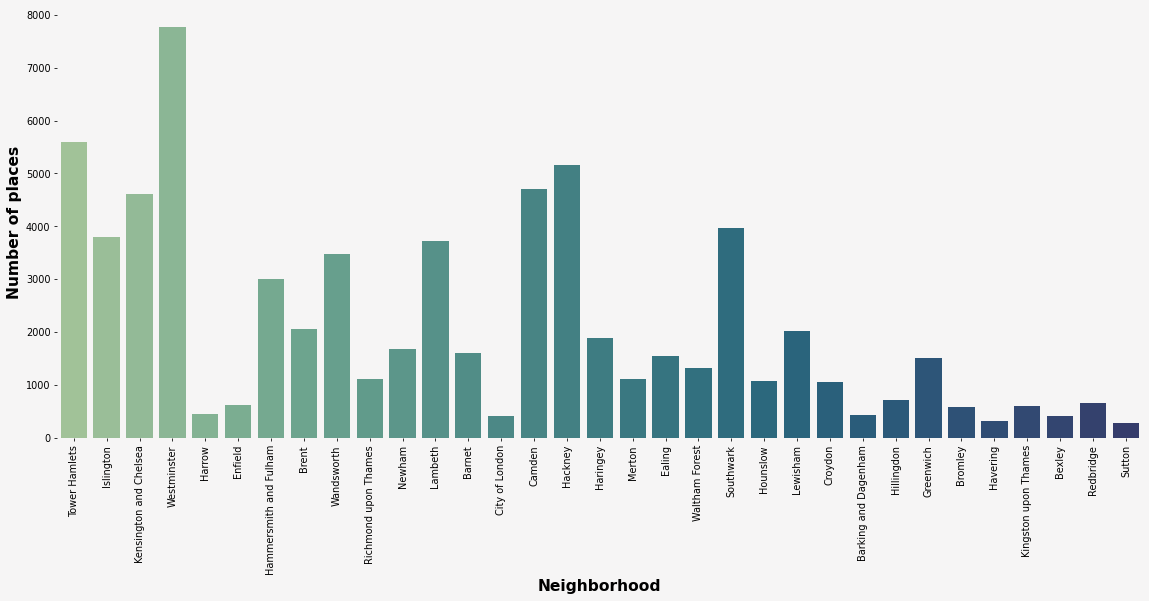

In [8]:
palette = 'crest'
fig, ax = plt.subplots(figsize = (20,8), dpi = 70)
for loc in ['left', 'right', 'top', 'bottom']:
    ax.spines[loc].set_visible(False)

sns.countplot(df, x='neighbourhood', ax = ax, palette=palette)
ax.set_facecolor('#f6f5f5')
ax.set_xlabel('Neighborhood', fontdict={'color':'black', 'weight':'bold', 'size': 16})
plt.xticks(rotation=90)
ax.set_ylabel('Number of places', fontdict={'color':'black', 'weight':'bold', 'size': 16})
fig.patch.set_facecolor('#f6f5f5')

This graph shows, that Westminster is the most popular neighbourhood

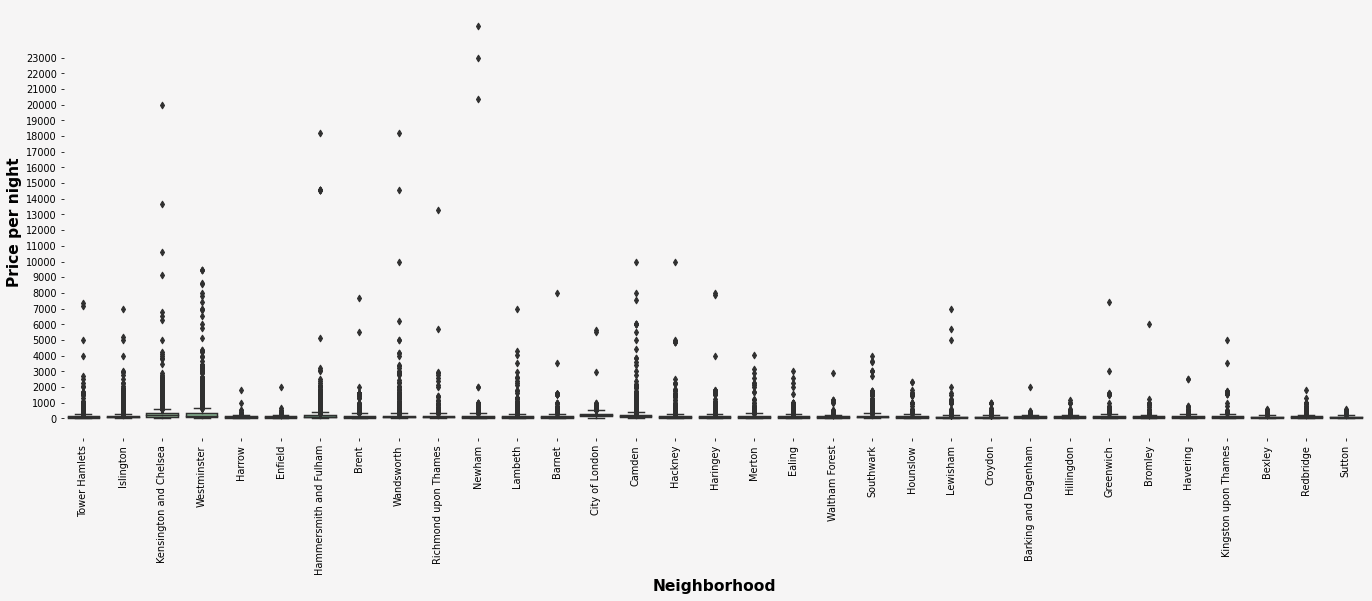

In [9]:
fig, ax = plt.subplots(figsize = (24,8), dpi = 70)
for loc in ['left', 'right', 'top', 'bottom']:
    ax.spines[loc].set_visible(False)

sns.boxplot(df,y='price' ,x='neighbourhood', ax = ax, palette=palette)
ax.set_facecolor('#f6f5f5')
ax.set_xlabel('Neighborhood', fontdict={'color':'black', 'weight':'bold', 'size': 16})
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 23001, 1000))
ax.set_ylabel('Price per night', fontdict={'color':'black', 'weight':'bold', 'size': 16})
fig.patch.set_facecolor('#f6f5f5')

Neighborhoods with the highest prices are:

1 - Westminster
2 - Kensington and Chelsea
3 - Camden
There are some really expensive outliers though: Newham; Hammersmith and Fulham; Wandsworth

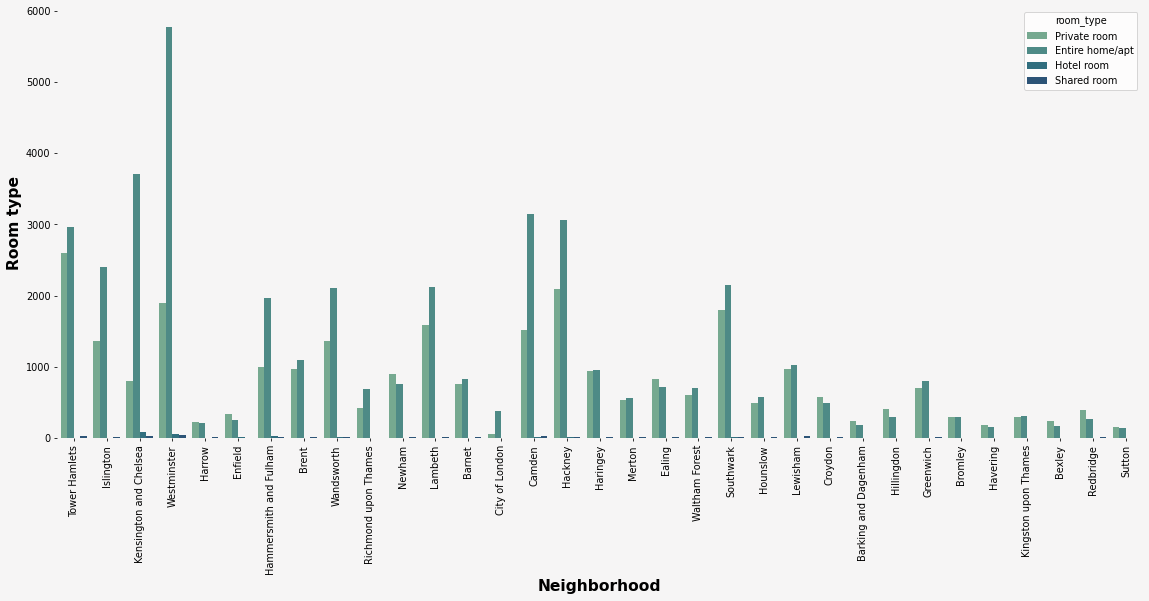

In [10]:
fig, ax = plt.subplots(figsize = (20,8), dpi = 70)
for loc in ['left', 'right', 'top', 'bottom']:
    ax.spines[loc].set_visible(False)

sns.countplot(df, x='neighbourhood', hue='room_type' ,ax = ax, palette=palette)
ax.set_facecolor('#f6f5f5')
ax.set_xlabel('Neighborhood', fontdict={'color':'black', 'weight':'bold', 'size': 16})
plt.xticks(rotation=90)
ax.set_ylabel('Room type', fontdict={'color':'black', 'weight':'bold', 'size': 16})
fig.patch.set_facecolor('#f6f5f5')

The most popular room type is "Entire home/apartment"

C:\Users\podte\AppData\Local\Temp\ipykernel_16736\621064423.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  revenue_per_neighbourood = df.groupby('neighbourhood').sum()


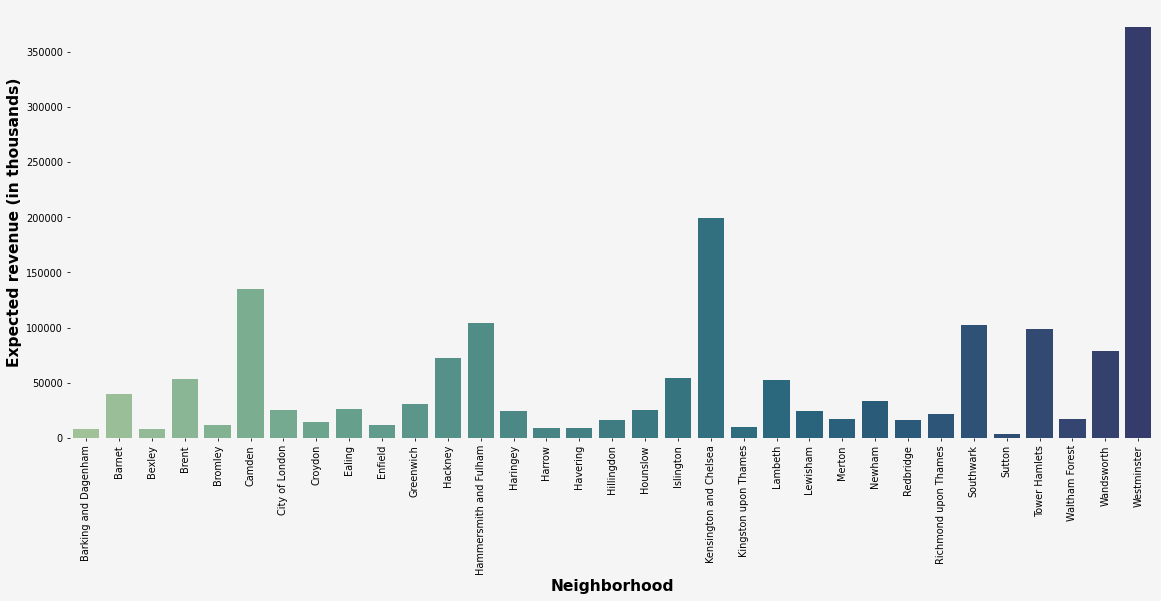

In [11]:
revenue_per_neighbourood = df.groupby('neighbourhood').sum()
revenue_per_neighbourood = revenue_per_neighbourood.rename_axis('neighbourhood').reset_index()
fig, ax = plt.subplots(figsize = (20,8), dpi = 70)
for loc in ['left', 'right', 'top', 'bottom']:
    ax.spines[loc].set_visible(False)

sns.barplot(revenue_per_neighbourood, y='expected_revenue_in_1000', x='neighbourhood', ax = ax, palette=palette)
ax.set_facecolor('#f6f5f5')
ax.set_xlabel('Neighborhood', fontdict={'color':'black', 'weight':'bold', 'size': 16})
plt.xticks(rotation=90)
ax.set_ylabel('Expected revenue (in thousands)', fontdict={'color':'black', 'weight':'bold', 'size': 16})
fig.patch.set_facecolor('#f6f5f5')

Although it was obvious, I made sure that hypothetically Westminster makes the most money out of the all neighbourhoods.

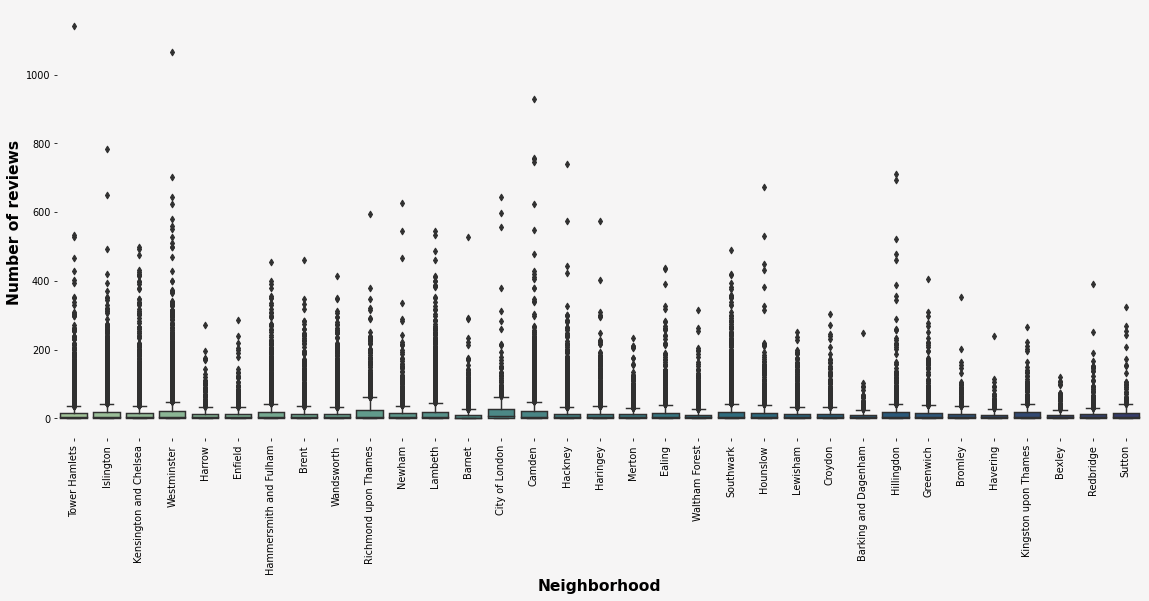

In [12]:
fig, ax = plt.subplots(figsize = (20,8), dpi = 70)
for loc in ['left', 'right', 'top', 'bottom']:
    ax.spines[loc].set_visible(False)

sns.boxplot(df, y='number_of_reviews', x='neighbourhood', ax = ax, palette=palette)
ax.set_facecolor('#f6f5f5')
ax.set_xlabel('Neighborhood', fontdict={'color':'black', 'weight':'bold', 'size': 16})
plt.xticks(rotation=90)
ax.set_ylabel('Number of reviews', fontdict={'color':'black', 'weight':'bold', 'size': 16})
fig.patch.set_facecolor('#f6f5f5')

This graph shows, that Westminster and Camden are neighbourhoods with the highest amount of reviews. There are some outliers though, let's look closer on them:

In [13]:
df[df['number_of_reviews']>900]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,expected_revenue_in_1000
1507,1436172,Cosy Dble in Kings Cross Houseshare,7716401,Paul,Camden,51.53087,-0.12672,Private room,85,1,929,2022-08-28,8.49,4,246,74,20.910
19324,19670926,Designer Studio Apartment in Central London,216187763,Leman Locke,Tower Hamlets,51.51421,-0.07062,Entire home/apt,361,1,1141,2022-08-20,21.79,7,357,248,128.877
31651,30760930,Double Garden View room - London House Hotel***,217727211,London House,Westminster,51.51397,-0.18949,Private room,343,1,1066,2022-09-08,24.17,23,319,631,109.417


There are three hosts represent these outliers: Leman Locke, London House and Paul. We should also keep in mind that there are many hosts with the same name, so we should always look at their host id as well.

In [14]:
hosts_reviews = df.groupby(['host_id']).sum().sort_values(by='number_of_reviews', ascending=False).iloc[:10]
hosts_reviews = hosts_reviews.rename_axis('host_id').reset_index()
id_name = df[['host_id', 'host_name']]
hosts_reviews = pd.merge(id_name, hosts_reviews, on='host_id').drop_duplicates().sort_values(by='number_of_reviews', ascending=False)
hosts_reviews

C:\Users\podte\AppData\Local\Temp\ipykernel_16736\4085901514.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hosts_reviews = df.groupby(['host_id']).sum().sort_values(by='number_of_reviews', ascending=False).iloc[:10]


,host_id,host_name,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,expected_revenue_in_1000
501,82436841,Max And Billie,316113254,1081.711880,-4.092250,2596,21,7356,101.78,441,5136,1444,638.185
522,166617599,Ben,1475554736,2214.990610,-7.564240,5681,43,5708,146.89,1849,4172,2211,525.530
0,580475,Alessandro,548974692,2265.578150,-6.136960,4613,48,4983,46.97,1936,0,5,0.000
374,83740964,Ali,1319794917220005384,6542.061505,-23.128409,13283,2836,4735,83.19,16129,6741,483,703.242
48,19583485,Lisa,1371524984919237113,1184.556204,-3.322694,3418,69,3778,102.37,529,1595,1439,230.033
71,28820321,Veronica,-1158054529141009928,14682.732451,-38.480197,41805,662,3225,100.10,81225,8313,473,2082.676
356,6982801,Peter,258523638,927.325440,-2.244400,1415,18,3058,41.51,324,5018,561,400.808
44,7716401,Paul,24326038,206.125980,-0.530680,385,4,2909,30.34,16,1146,248,111.066
565,224866971,Sonder (London),-2162484100283586201,8087.023631,-23.196149,110133,839,2862,108.07,24649,35348,742,20547.283
722,282403697,Daniel,4027319652428218380,1442.926870,-5.113276,3660,28,2604,88.65,784,2832,1334,344.469


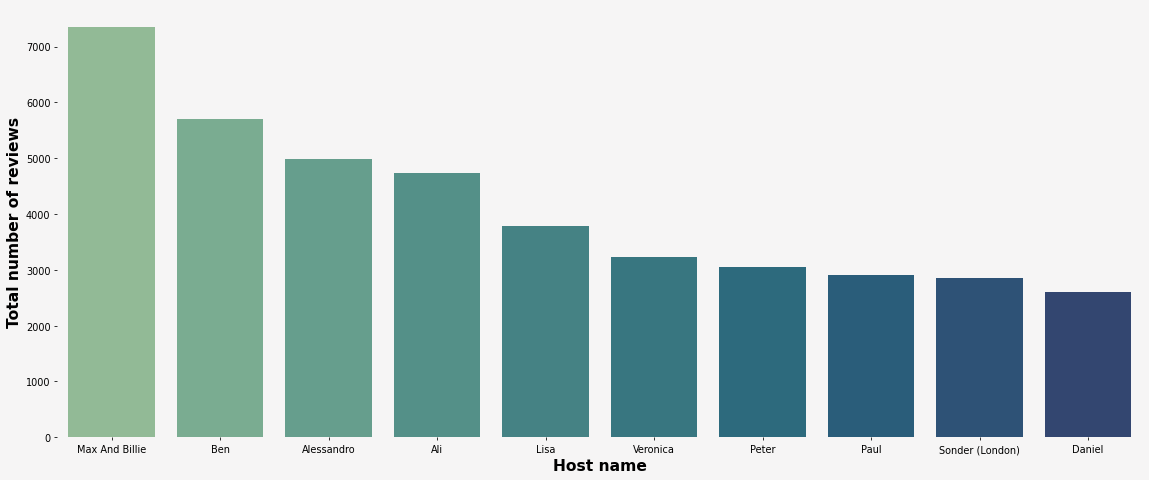

In [15]:
fig, ax = plt.subplots(figsize = (20,8), dpi = 70)
for loc in ['left', 'right', 'top', 'bottom']:
    ax.spines[loc].set_visible(False)

sns.barplot(hosts_reviews, x='host_name', y='number_of_reviews', ax = ax, palette=palette)
ax.set_facecolor('#f6f5f5')
ax.set_xlabel('Host name', fontdict={'color':'black', 'weight':'bold', 'size': 16})
ax.set_ylabel('Total number of reviews', fontdict={'color':'black', 'weight':'bold', 'size': 16})
fig.patch.set_facecolor('#f6f5f5')

From that graph we can see, that Leman Locke, London House and Paul are not in the top 10 hosts with the most review (we can think of this metric as of busy host).
You may say that Paul is in top 10, but this is another Paul. We should always keep in mind, that there are hosts with the same name, so we should always check their host id.
Now let's explore those 10 hosts with the most reviews.

In [16]:
popular_name_id = hosts_reviews['host_id']
popular_df = pd.merge(popular_name_id, df, on='host_id').drop_duplicates()
x = len(popular_df[popular_df['availability_365'] == 0]) # availability 0 days in a year
y = len(popular_df) # all facilities of top 10 hosts
no_available_percentage = x * 100/ y
print("%.2f" % no_available_percentage , '% of all facilities from top 10 most popular hosts are unavailable during the year')
print('\nThere are two possible explanation: \n1) The facility is being reconstructed \n2) The facility has been rented for the whole year')
popular_df

49.07 % of all facilities from top 10 most popular hosts are unavailable during the year

There are two possible explanation: 
1) The facility is being reconstructed 
2) The facility has been rented for the whole year


,host_id,id,name,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,expected_revenue_in_1000
0,82436841,14287120,Delightful Notting Hill Studio,Max And Billie,Kensington and Chelsea,51.510180,-0.194860,Entire home/apt,130,1,338,2022-09-04,4.57,21,271,47,35.230
1,82436841,14298552,Elegant Notting Hill Studio,Max And Billie,Kensington and Chelsea,51.510140,-0.194890,Entire home/apt,141,1,433,2022-09-07,5.92,21,222,92,31.302
2,82436841,14299729,Irresistable Notting Hill Studio,Max And Billie,Kensington and Chelsea,51.510160,-0.194860,Entire home/apt,136,1,416,2022-09-04,5.64,21,244,60,33.184
3,82436841,14300513,Kick-Ass Notting Hill Studio,Max And Billie,Kensington and Chelsea,51.510170,-0.194890,Entire home/apt,142,1,476,2022-09-07,6.44,21,223,123,31.666
4,82436841,14300858,Picturesque Notting Hill Studio,Max And Billie,Kensington and Chelsea,51.510050,-0.194860,Entire home/apt,164,1,417,2022-09-07,5.68,21,233,93,38.212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,282403697,679330345904393445,"Stylish, artistically designed apartment in Lo...",Daniel,Barnet,51.571560,-0.201754,Entire home/apt,217,1,8,2022-09-04,5.33,28,33,8,7.161
746,282403697,686923263334599661,"Beautiful, Calming Studio Apartment in London",Daniel,Barnet,51.573568,-0.202148,Entire home/apt,147,1,7,2022-09-10,6.56,28,40,7,5.880
747,282403697,693180051265457915,"Stunning, Nature Inspired Studio Flat In London",Daniel,Barnet,51.572736,-0.202667,Entire home/apt,164,1,5,2022-09-08,5.00,28,57,5,9.348
748,282403697,698505037131457391,Beautiful Moroccan Themed Studio Flat in London,Daniel,Barnet,51.573754,-0.202365,Entire home/apt,161,1,1,2022-09-04,1.00,28,51,1,8.211


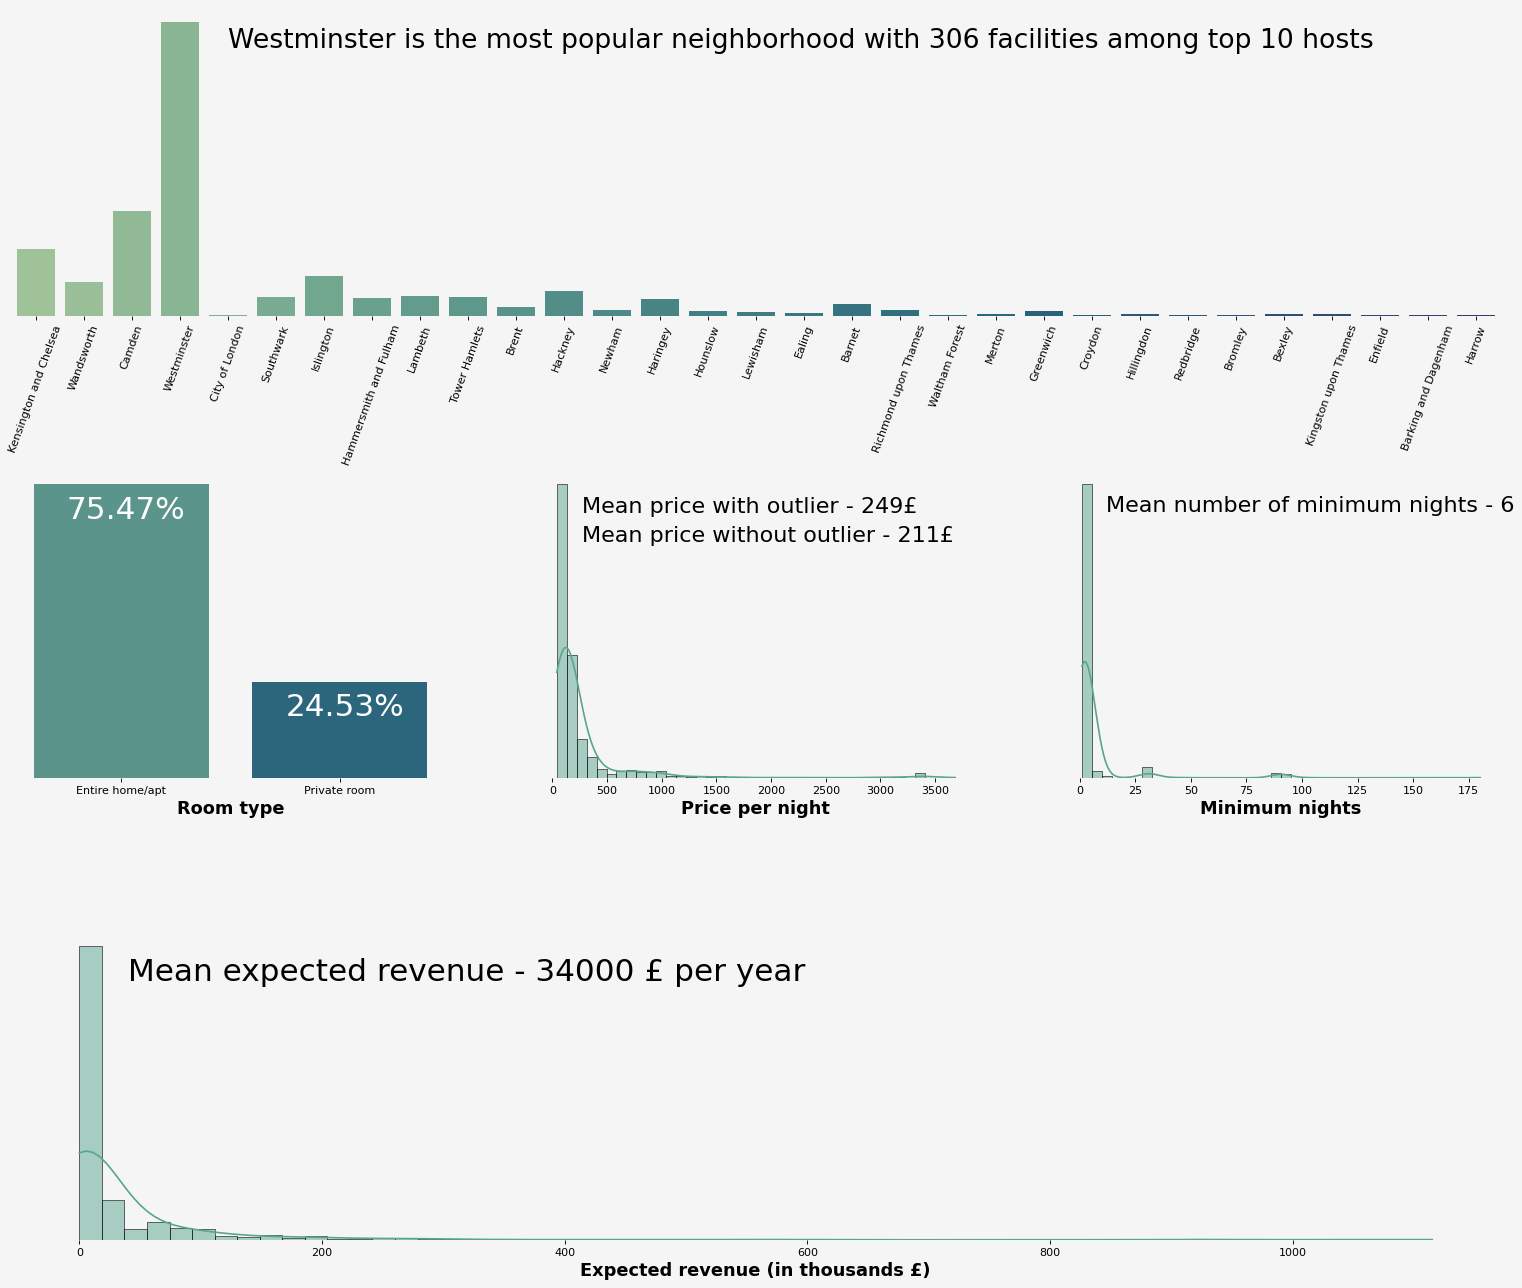

In [17]:
fig = plt.figure(figsize = (24,20),dpi = 80)
gs = fig.add_gridspec(3,3)
gs.update(wspace = 0.2, hspace = 0.5)

ax1 = fig.add_subplot(gs[0,0:])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,:])

axes = [ax1, ax3, ax4, ax5, ax6]

for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f6f5f5')
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

sns.countplot(data = popular_df, x = 'neighbourhood', ax=ax1, fill = True, linewidth=1, palette=palette)
ax1.axes.set_xticklabels(popular_df.neighbourhood.unique(),rotation=70, size=10)
ax1.text(4, 280, f'Westminster is the most popular neighborhood with {popular_df.neighbourhood.value_counts()["Westminster"]} facilities among top 10 hosts', fontdict={'color':'black', 'size': 24})

sns.countplot(data = popular_df, x = 'room_type', ax=ax3, fill = True, linewidth=1, palette=palette)
ax3.set_xlabel('Room type', fontdict={'color':'black', 'weight':'bold', 'size': 16})
home_percentage = len(popular_df[popular_df['room_type'] == 'Entire home/apt']) * 100 /len(popular_df)
room_percentage = 100 - home_percentage
ax3.text(-0.25, 500 ,f'{"%.2f" % home_percentage}%', fontdict={'color':"white", 'size': 28})
ax3.text(0.75, 120 ,f'{"%.2f" % room_percentage}%', fontdict={'color':"white", 'size': 28})

sns.histplot(data = popular_df, x = 'price', ax=ax4 ,bins=40, kde=True, linewidth=0.5, color=sns.color_palette("crest")[1])
ax4.set_xlabel('Price per night', fontdict={'color':'black', 'weight':'bold', 'size': 16})
home_percentage = len(popular_df[popular_df['room_type'] == 'Entire home/apt']) * 100 /len(popular_df)
room_percentage = 100 - home_percentage
ax4.text(270, 370,f'Mean price with outlier - {int(popular_df.price.mean())}£', fontdict={'color':"black", 'size': 20})
ax4.text(270, 330,f'Mean price without outlier - {int(popular_df[popular_df.price < 3000].price.mean())}£', fontdict={'color':"black", 'size': 20})


sns.histplot(data = popular_df, x = 'minimum_nights', ax=ax5 ,bins=40, kde=True, linewidth=0.5, color=sns.color_palette("crest")[1])
ax5.set_xlabel('Minimum nights', fontdict={'color':'black', 'weight':'bold', 'size': 16})
ax5.text(12, 620,f'Mean number of minimum nights - {int(popular_df.minimum_nights.mean())}', fontdict={'color':"black", 'size': 20})

popular_df['expected_revenue'] = popular_df.price * popular_df.availability_365 / 1000
sns.histplot(data = popular_df, x = 'expected_revenue', ax=ax6 ,bins=60, kde=True, linewidth=0.5, color=sns.color_palette("crest")[1])
ax6.set_xlabel('Expected revenue (in thousands £)', fontdict={'color':'black', 'weight':'bold', 'size': 16})
ax6.text(40, 470,f'Mean expected revenue - {int(popular_df.expected_revenue.mean())}000 £ per year', fontdict={'color':"black", 'size': 28})

fig.patch.set_facecolor('#f6f5f5')

Let's explore which hosts are the busiest and why:

In [18]:
df = df.sort_values(by='calculated_host_listings_count')
host_facilities = pd.DataFrame({'host_id': df.host_id, 'number_of_facilities':df.calculated_host_listings_count}).sort_values(by='number_of_facilities', ascending=False).drop_duplicates()
busiest_hosts = host_facilities[:10]
busiest_hosts = pd.merge(busiest_hosts, df, on='host_id')
columns = busiest_hosts.drop(columns=['host_id', 'host_name', 'number_of_facilities'])
busiest_names = busiest_hosts.drop(columns=columns)
busiest_names = busiest_names.drop_duplicates()


The most popular hosts and how many facilities they have:

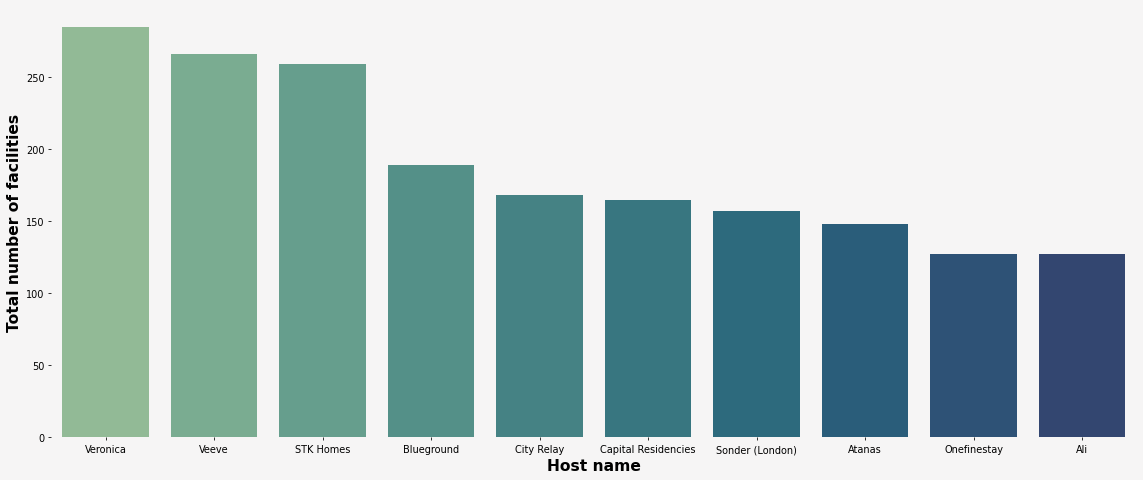

In [19]:
fig, ax = plt.subplots(figsize = (20,8), dpi = 70)
for loc in ['left', 'right', 'top', 'bottom']:
    ax.spines[loc].set_visible(False)

sns.barplot(busiest_names, x='host_name', y='number_of_facilities', ax = ax, palette=palette)
ax.set_facecolor('#f6f5f5')
ax.set_xlabel('Host name', fontdict={'color':'black', 'weight':'bold', 'size': 16})
ax.set_ylabel('Total number of facilities', fontdict={'color':'black', 'weight':'bold', 'size': 16})
fig.patch.set_facecolor('#f6f5f5')

Veronica is the host with the most facilities. Let's look on the expected revenue they make:

In [20]:
revenues_by_hosts = df.groupby('host_id').sum().sort_values(by='expected_revenue_in_1000', ascending=False)
revenues_by_hosts = revenues_by_hosts.rename_axis('host_id').reset_index()
columns1 = revenues_by_hosts.drop(columns=['host_id', 'expected_revenue_in_1000'])
cols_rev = revenues_by_hosts.drop(columns=columns1)
busiest_revenues = pd.merge(cols_rev, busiest_names, on='host_id').drop_duplicates()
busiest_revenues

C:\Users\podte\AppData\Local\Temp\ipykernel_16736\2052880969.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  revenues_by_hosts = df.groupby('host_id').sum().sort_values(by='expected_revenue_in_1000', ascending=False)


,host_id,expected_revenue_in_1000,number_of_facilities,host_name
0,129230780,34946.746,259,STK Homes
1,258154594,22973.379,148,Atanas
2,224866971,20547.283,157,Sonder (London)
3,33889201,10511.264,266,Veeve
4,314162972,9923.458,189,Blueground
5,156158778,8862.151,127,Onefinestay
6,48165024,6786.783,165,Capital Residencies
7,1432477,4971.896,168,City Relay
8,28820321,2082.676,285,Veronica
9,83740964,703.242,127,Ali


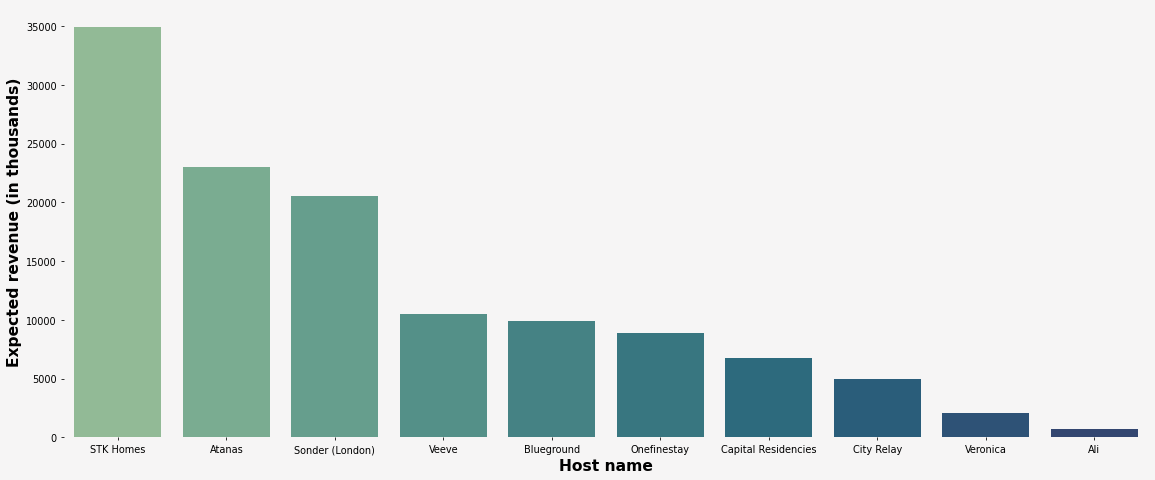

In [21]:
fig, ax = plt.subplots(figsize = (20,8), dpi = 70)
for loc in ['left', 'right', 'top', 'bottom']:
    ax.spines[loc].set_visible(False)

sns.barplot(busiest_revenues, x='host_name', y='expected_revenue_in_1000', ax = ax, palette=palette)
ax.set_facecolor('#f6f5f5')
ax.set_xlabel('Host name', fontdict={'color':'black', 'weight':'bold', 'size': 16})
ax.set_ylabel('Expected revenue (in thousands)', fontdict={'color':'black', 'weight':'bold', 'size': 16})
fig.patch.set_facecolor('#f6f5f5')

Although Veronica is the busiest one, she doesn't expect the biggest revenue. Let's look on top 10 biggest revenues in the entire dataset:

In [22]:
df = df.sort_values(by='expected_revenue_in_1000')
host_revenues = pd.DataFrame({'host_id': df.host_id, 'revenue':df.expected_revenue_in_1000}).sort_values(by='revenue', ascending=False)
host_revenues = host_revenues.groupby('host_id').sum()
host_revenues = host_revenues.rename_axis('host_id').reset_index()
richest_hosts = host_revenues.sort_values(by='revenue', ascending=False)[:10]
richest_hosts = pd.merge(richest_hosts, df, on='host_id')
columns = richest_hosts.drop(columns=['host_id', 'host_name', 'revenue'])
richest_names = richest_hosts.drop(columns=columns)
richest_names = richest_names.drop_duplicates()
richest_names

,host_id,revenue,host_name
0,305877942,50493.370,Fenna BELVILLA
9,129230780,34946.746,STK Homes
268,63293666,26489.010,Atanas
389,258154594,22973.379,Atanas
537,224866971,20547.283,Sonder (London)
694,269308503,12910.023,Michael
773,36943329,12854.294,Teodora
833,146594021,11520.960,Caroline
862,336242959,10750.855,Tony
913,33889201,10511.264,Veeve


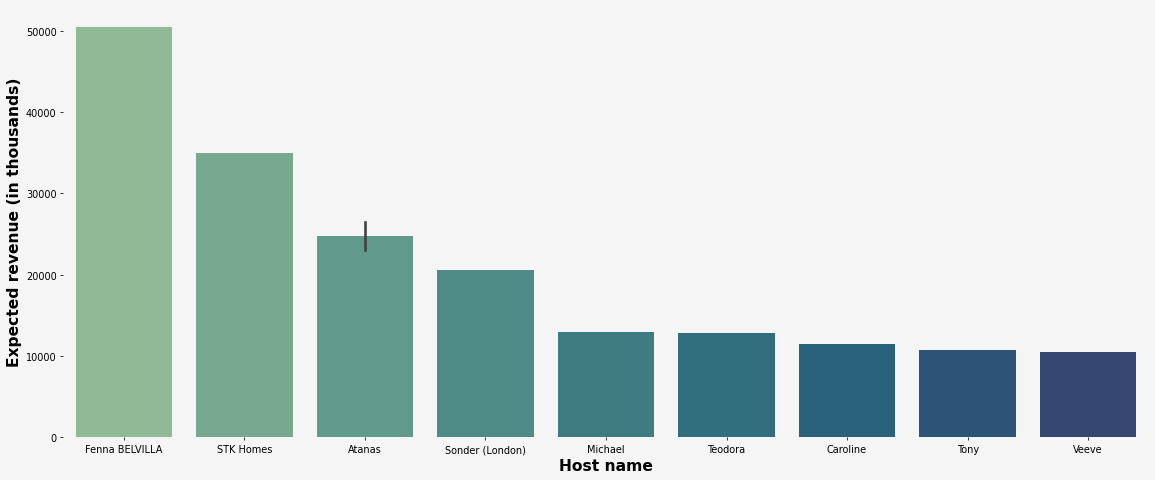

In [23]:
fig, ax = plt.subplots(figsize = (20,8), dpi = 70)
for loc in ['left', 'right', 'top', 'bottom']:
    ax.spines[loc].set_visible(False)

sns.barplot(richest_names, x='host_name', y='revenue', ax = ax, palette=palette)
ax.set_facecolor('#f6f5f5')
ax.set_xlabel('Host name', fontdict={'color':'black', 'weight':'bold', 'size': 16})
ax.set_ylabel('Expected revenue (in thousands)', fontdict={'color':'black', 'weight':'bold', 'size': 16})
fig.patch.set_facecolor('#f6f5f5')

This graph shows that 4 of 10 the richest people on the list are in the busiest graph. There are two hosts with the same name, which can lead to misinterpreting, so we should always consider host_id as well. In the next part of this notebook I will predict the price of the facility based on the information we've got.